1. [Loading and looking to Data](#1)
1. [visualization](#2)
    * [Correlation](#3)
    * [Box Plot](#4)
    * [Pair Plot](#5)
1. [Outlier](#6)
    * [drop outliers](#7)
1. [train test split](#8)
1. [Basic KNN method](#9)
1. [PCA](#10)
1. [Final visualization](#11)
1. [NCA](#12)

<a id = "1"></a><br>
# Loading and looking to Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.drop(["Unnamed: 32","id"],inplace=True,axis=1)

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df = df.rename(columns={"diagnosis":"target"})

In [9]:
df['target'].value_counts()

B    357
M    212
Name: target, dtype: int64

In [10]:
df['target'] = df['target'].replace({'M': 0, 'B': 1})

In [11]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

<a id = "2"></a><br>
# visualization

<a id = "3"></a><br>
## Correlation

In [12]:
corr_matrix = df.corr()

Text(0.5, 1.0, 'Correlation between features')

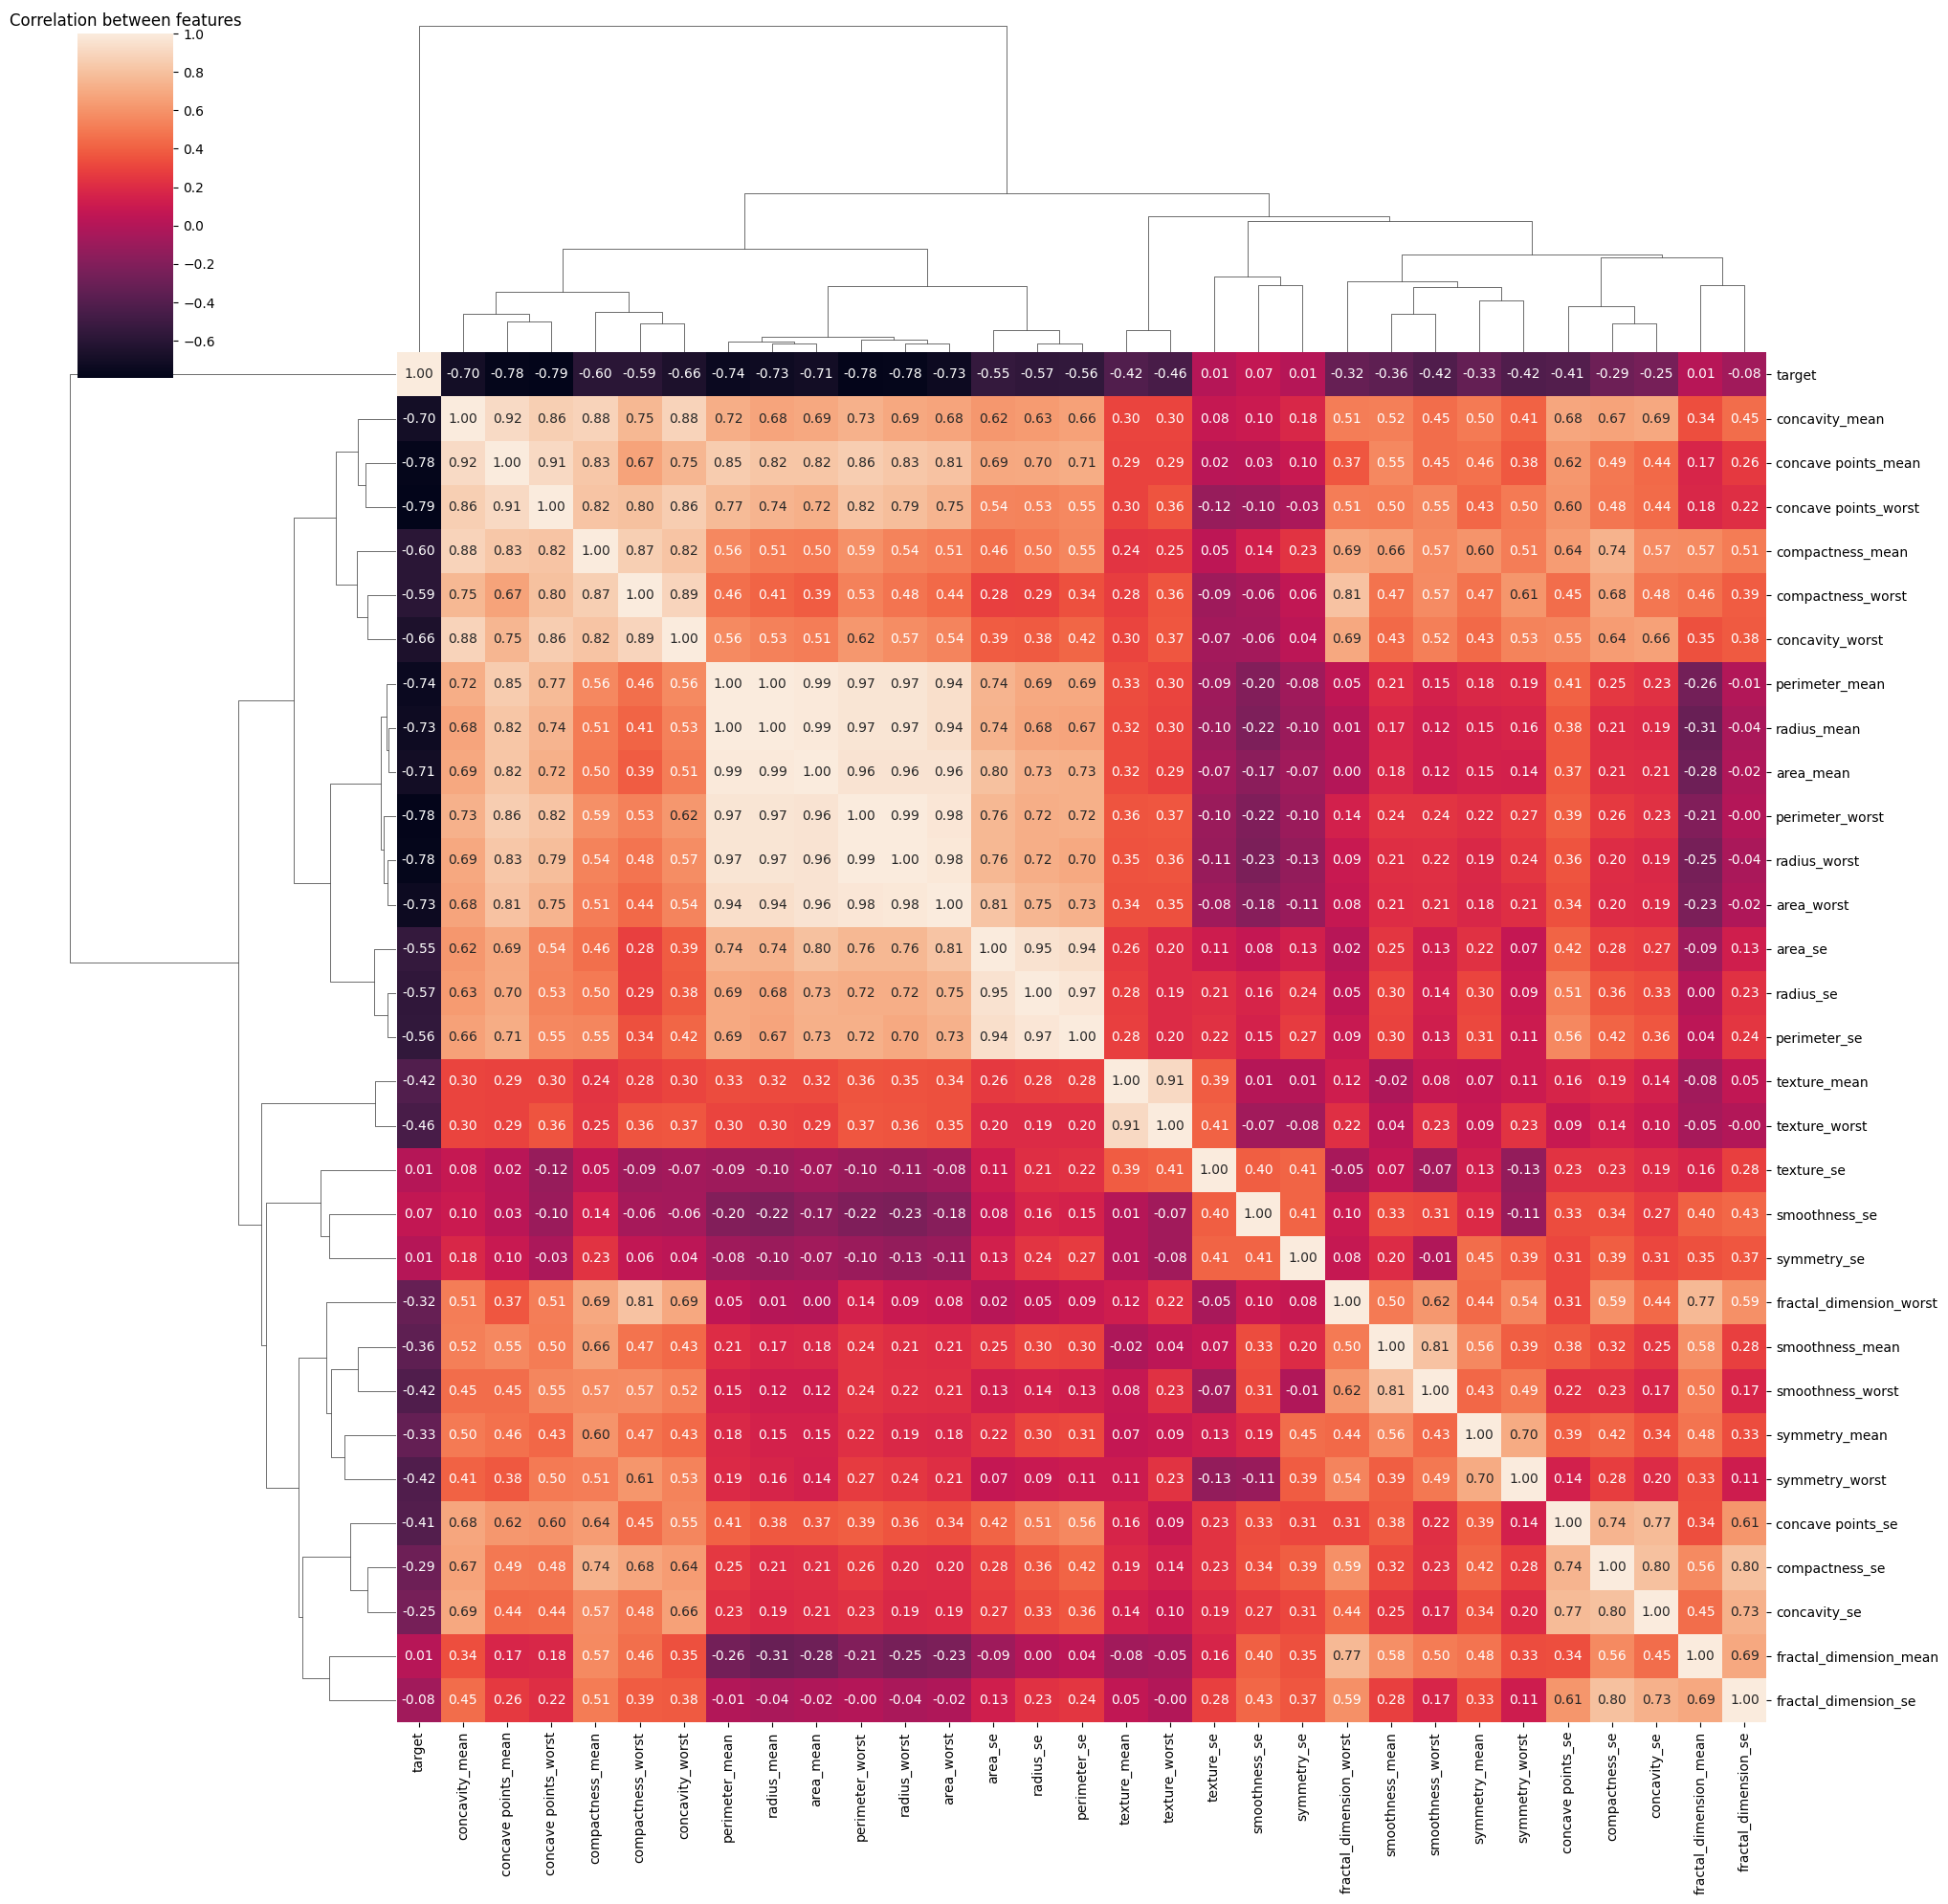

In [13]:
sns.clustermap(corr_matrix, annot=True, fmt=".2f",figsize=(20,20))
plt.title("Correlation between features")


Text(0.5, 1.0, 'Correlation between features')

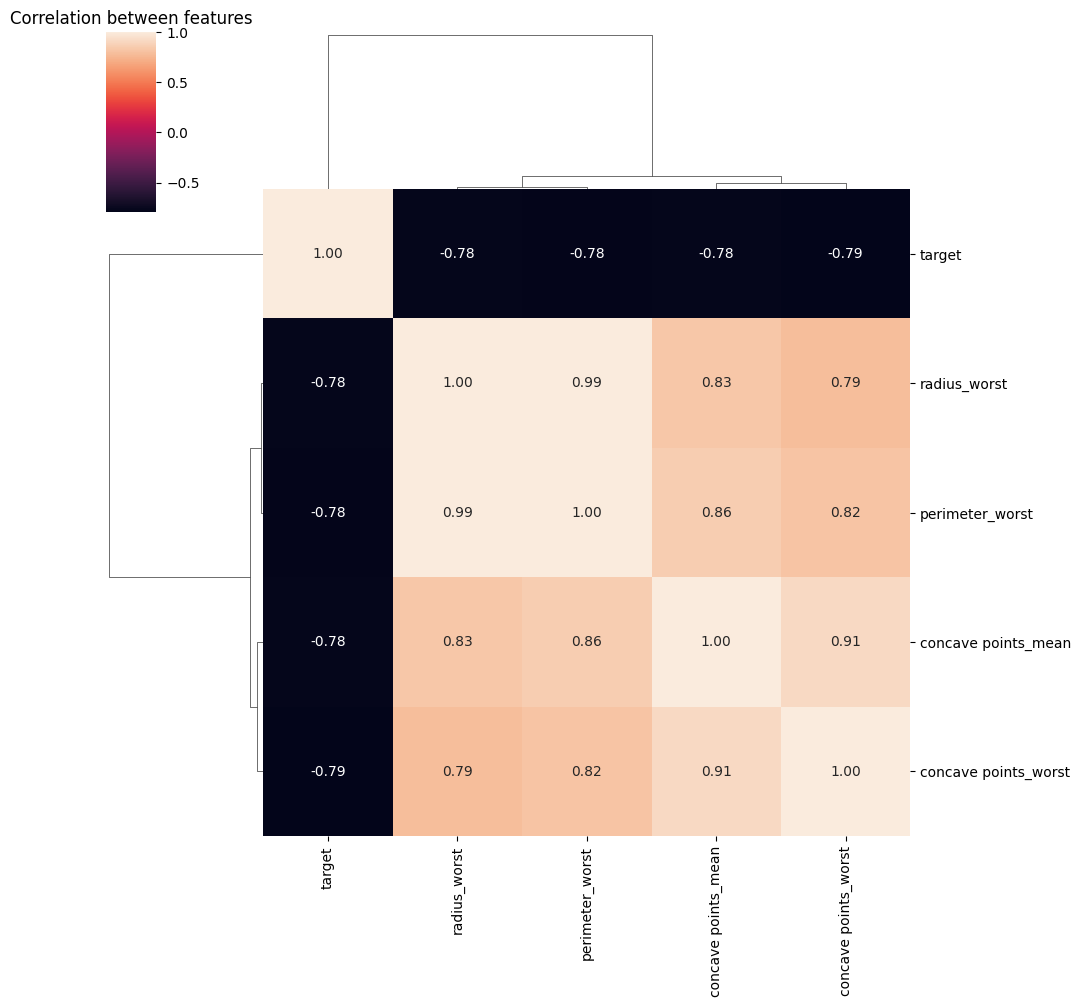

In [14]:
# more filtered and simple corr
threshold = 0.75
filtre = np.abs(corr_matrix['target'])>threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot=True, fmt=".2f",figsize=(10,10))
plt.title("Correlation between features")

<a id = "4"></a><br>
## Box plot

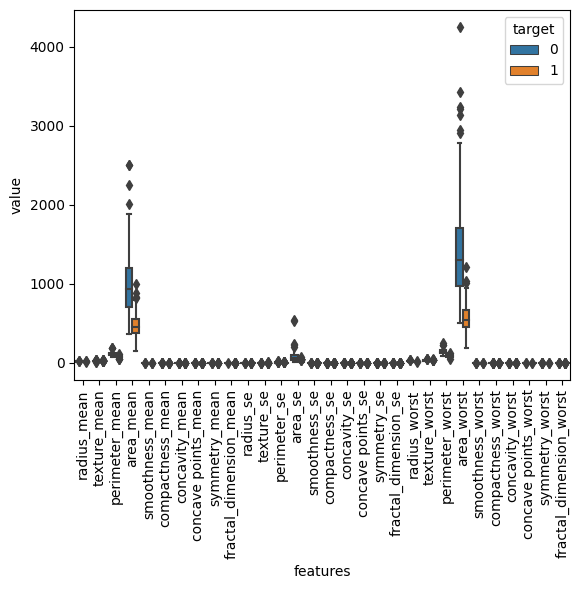

In [15]:
df_melted = pd.melt(df,id_vars="target",var_name="features",value_name="value")
plt.figure()
sns.boxplot(x="features",y="value",hue="target",data=df_melted)
plt.xticks(rotation=90)
plt.show()

<a id = "5"></a><br>
## pair plot

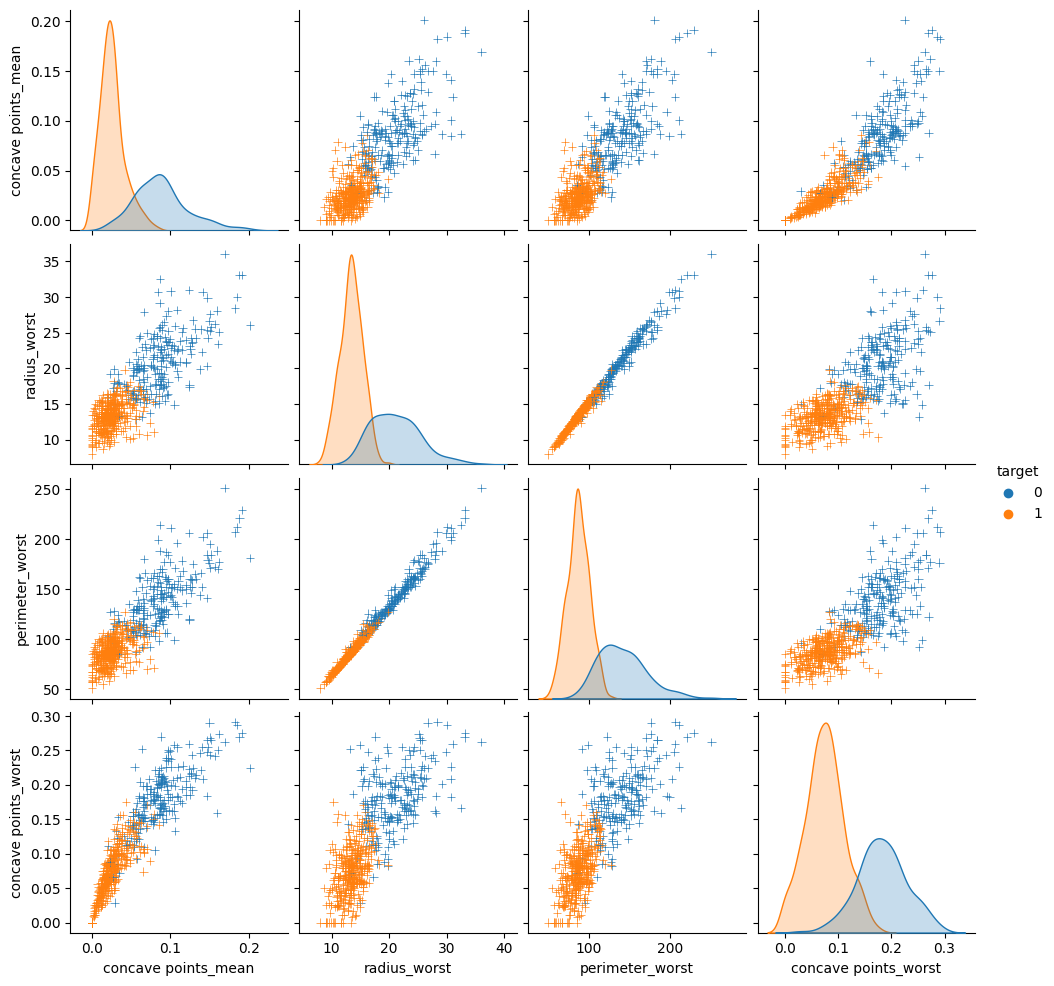

In [16]:
sns.pairplot(df[corr_features],diag_kind="kde",markers="+",hue="target")
plt.show()

<a id = "6"></a><br>
# outlier

In [17]:
y=df.target
x=df.drop(['target'],axis=1)
columns = x.columns.tolist()

In [18]:
clf = LocalOutlierFactor()

In [19]:
y_pred = clf.fit_predict(x)
x_score = clf.negative_outlier_factor_

In [20]:
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

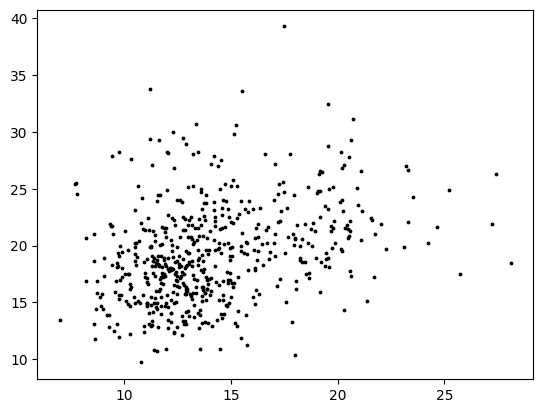

In [21]:
plt.figure()
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Data Point")

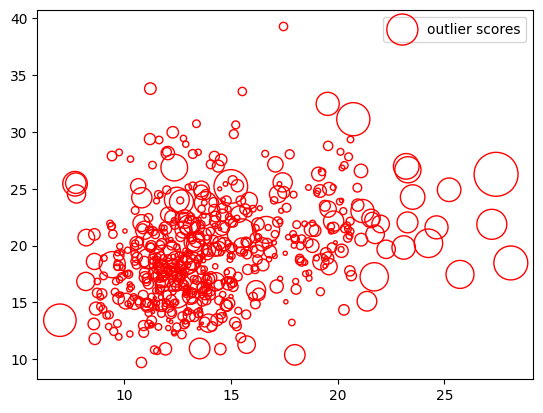

In [22]:
radius = (x_score.max() - x_score) / (x_score.max() - x_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], s=1000 * radius, edgecolors="r", facecolors="none", label="outlier scores")
plt.legend()
plt.show()


In [23]:
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()


<a id = "7"></a><br>
## drop outliers

In [24]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

<a id = "8"></a><br>
# train test split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train_df = pd.DataFrame(x_train,columns=columns)

In [27]:
x_train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,...,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02,3.970000e+02
mean,2.013503e-17,-2.953137e-16,-5.369341e-17,-2.237225e-16,-3.803283e-17,-2.192481e-16,4.474450e-17,7.159121e-17,-1.657784e-15,6.700490e-16,...,1.566058e-16,-4.608684e-16,-4.541567e-16,-6.487953e-17,6.577442e-16,-1.118613e-16,8.054011e-17,-7.159121e-17,-5.481202e-17,4.027005e-17
std,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,...,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00,1.001262e+00
min,-1.712388e+00,-2.175361e+00,-1.632924e+00,-1.303791e+00,-2.404872e+00,-1.638974e+00,-1.126020e+00,-1.291511e+00,-2.340956e+00,-1.731378e+00,...,-1.554165e+00,-2.165353e+00,-1.558852e+00,-1.163524e+00,-2.217924e+00,-1.426295e+00,-1.351626e+00,-1.782104e+00,-2.098683e+00,-1.623010e+00
25%,-7.039450e-01,-7.291157e-01,-7.065592e-01,-6.765379e-01,-7.086599e-01,-7.677983e-01,-7.505222e-01,-7.462174e-01,-6.923019e-01,-7.154003e-01,...,-6.821946e-01,-7.528643e-01,-7.019438e-01,-6.578384e-01,-7.527979e-01,-6.715073e-01,-7.547935e-01,-7.847938e-01,-6.687460e-01,-6.938485e-01
50%,-2.446426e-01,-1.109439e-01,-2.549616e-01,-2.989145e-01,-9.870612e-02,-2.500035e-01,-3.559314e-01,-3.888829e-01,-3.575803e-02,-1.774476e-01,...,-2.715302e-01,-5.708877e-02,-2.809144e-01,-3.430225e-01,-4.097822e-02,-2.830139e-01,-2.487165e-01,-2.253839e-01,-1.273445e-01,-2.398587e-01
75%,4.919745e-01,5.648931e-01,5.336490e-01,3.852569e-01,6.086412e-01,5.418139e-01,4.663710e-01,6.740944e-01,5.587789e-01,4.845408e-01,...,4.880926e-01,6.757303e-01,5.339215e-01,2.884427e-01,6.097035e-01,5.982844e-01,5.947450e-01,7.322025e-01,4.793437e-01,4.494271e-01
max,4.033514e+00,4.645288e+00,4.063861e+00,5.327298e+00,4.767417e+00,4.097233e+00,4.417475e+00,4.049923e+00,4.490747e+00,4.845302e+00,...,3.590418e+00,3.877586e+00,3.782128e+00,4.325859e+00,3.771406e+00,4.615614e+00,3.461489e+00,2.511223e+00,5.979346e+00,5.130159e+00


<a id = "9"></a><br>
## Basic KNN method

In [28]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
score=knn.score(x_test,y_test)

In [29]:
print(f"Score: {score}")
print(f"CM: {cm}")
print(f"Basic KNN Acc: {acc}")

Score: 0.9415204678362573
CM: [[ 59   3]
 [  7 102]]
Basic KNN Acc: 0.9415204678362573


In [30]:
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    k_range = list(range(1, 31))
    weight_options = ["uniform", "distance"]
    print()
    param_grid = dict(n_neighbors=k_range, weights=weight_options)

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train)

    print(f"best training score {grid.best_score_}, with parameters {grid.best_params_}")
    print()

    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)

    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    print(f"Test Score: {acc_test}, Train Score: {acc_train}")
    print()
    print(f"CM test: {cm_test}")
    print(f"CM train: {cm_train}")

    return knn

In [31]:
grid = KNN_Best_Params(x_train,x_test,y_train,y_test)


best training score 0.964551282051282, with parameters {'n_neighbors': 14, 'weights': 'uniform'}

Test Score: 0.9473684210526315, Train Score: 0.9697732997481109

CM test: [[ 57   5]
 [  4 105]]
CM train: [[138  11]
 [  1 247]]


<a id = "10"></a><br>
# PCA

Text(0.5, 1.0, 'PCA: p1 vs p2')

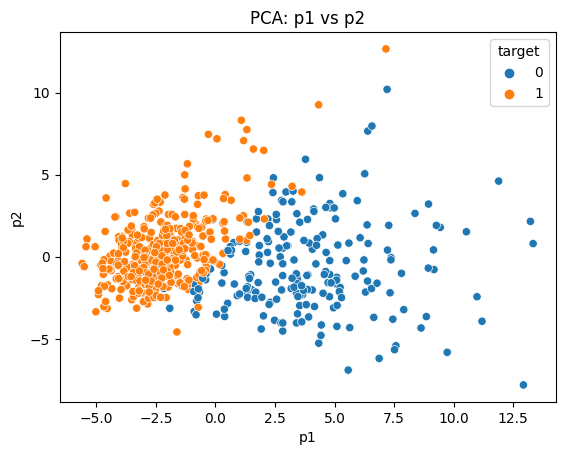

In [32]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
pca = PCA(n_components=2)
pca.fit(x_scaled)
x_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(x_reduced_pca, columns=["p1", "p2"])
pca_data["target"] = y
sns.scatterplot(x="p1", y="p2", hue="target", data=pca_data)
plt.title("PCA: p1 vs p2")


In [33]:
x_train_pca,x_test_pca,y_train_pca,y_test_pca = train_test_split(x_reduced_pca,y,test_size=0.3,random_state=42)

In [34]:
grid_pca = KNN_Best_Params(x_train_pca, x_test_pca, y_train_pca, y_test_pca)



best training score 0.9419871794871796, with parameters {'n_neighbors': 8, 'weights': 'uniform'}

Test Score: 0.9415204678362573, Train Score: 0.9445843828715366

CM test: [[ 58   4]
 [  6 103]]
CM train: [[140   9]
 [ 13 235]]


<a id = "11"></a><br>
# visualize

Text(0.5, 1.0, "2-Class classification (k = 8, weights = 'uniform')")

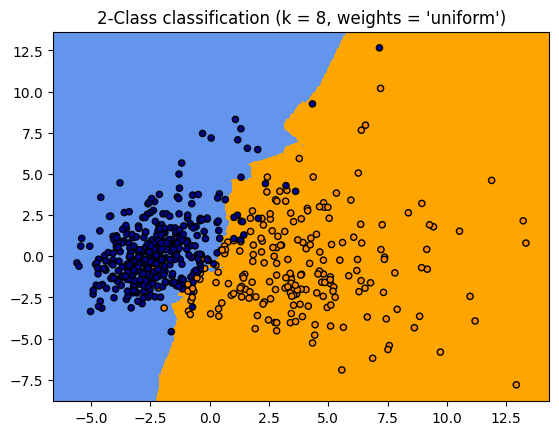

In [35]:
from matplotlib.colors import ListedColormap

# Visualize
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])
h = 0.05  # Step size in the mesh

X = x_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')" % (len(np.unique(y)), grid_pca.n_neighbors, grid_pca.weights))


<a id = "12"></a><br>
# NCA


best training score 0.9419871794871796, with parameters {'n_neighbors': 8, 'weights': 'uniform'}

Test Score: 0.9415204678362573, Train Score: 0.9445843828715366

CM test: [[ 58   4]
 [  6 103]]
CM train: [[140   9]
 [ 13 235]]


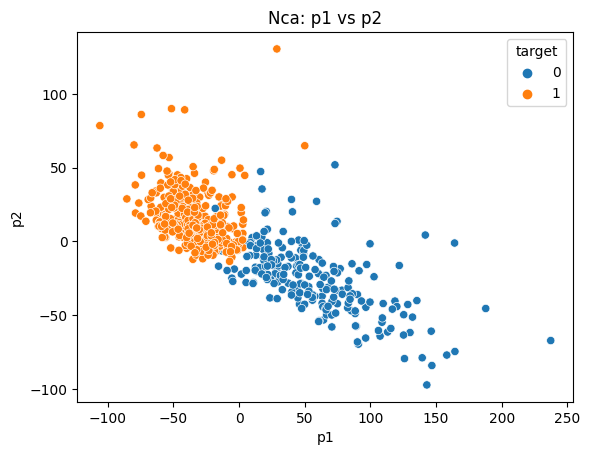

In [36]:
nca = NeighborhoodComponentsAnalysis(n_components=2,random_state=42)
nca.fit(x_scaled,y)
x_reduced_nca=nca.transform(x_scaled)
nca_data=pd.DataFrame(x_reduced_nca,columns=["p1","p2"])
nca_data["target"]=y
sns.scatterplot(x="p1",y="p2",hue="target",data=nca_data)
plt.title("Nca: p1 vs p2")
x_train_nca,x_test_nca,y_train_nca,y_test_nca = train_test_split(x_reduced_pca,y,test_size=0.3,random_state=42)
grid_pca = KNN_Best_Params(x_train_nca, x_test_nca, y_train_nca, y_test_nca)